In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
data = iris.data
columns = iris.feature_names

In [ ]:
# Add outliers to the dataset
np.random.seed(42)
outliers_indices = np.random.choice(range(len(data)), size=10, replace=False)
data[outliers_indices] += np.random.normal(10, 5, size=(10, 4))

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [ ]:
# Fit Isolation Forest model for anomaly detection
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(data_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
# Predict outliers
outliers = model.predict(data_scaled)


In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

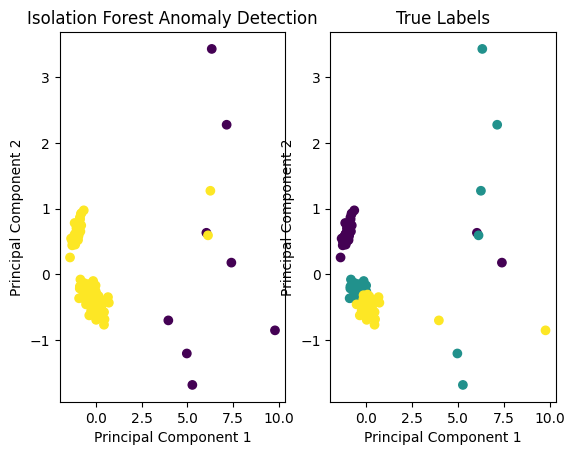

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=outliers, cmap='viridis')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=iris.target, cmap='viridis')
plt.title('True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()